# CEGE0004: Assignment 1
# Final Performance Comparison
In this notebook we will compare the performance of different models

## Start working by importing the required packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import pickle
import matplotlib.pyplot as plt

## Load Models

In [2]:
with open("DecisionTree.sav", "rb") as f:
    decision_tree = pickle.load(f)

with open("gaussion_nb.sav", "rb") as f:
    bayesian_learning = pickle.load(f)

with open("ensemble.sav", "rb") as f:
    ensemble = pickle.load(f)
    
with open("Instance_based.sav", "rb") as f:
    knn = pickle.load(f)

with open("MLP_sklearn.sav", "rb") as f:
    MLP = pickle.load(f)

## Load Dataset

In [3]:
x_test = pd.read_csv("x_test.csv")
y_test = pd.read_csv("y_test.csv")

## Define a function to calculate accuracy

In [4]:
def accuracy(ys, ys_hat):
    res = 0
    for y, y_hat in zip(ys, ys_hat):
        if y == y_hat:
            res += 1
    res /= len(ys)
    return res

## Predict the result to see the performance of different models

## Decision Tree

In [5]:
y_pred = decision_tree.predict(x_test)
score = accuracy_score(y_pred, y_test)
print('Test accuracy of Desision Tree is '+ str(score))

Test accuracy of Desision Tree is 0.8263333333333334


### The accuracy of DecisionTreeClassifier(max_depth=3,criterion='gini') is 82.6%

## Instance Based

In [6]:
y_test = np.ravel(y_test)
y_test_pred_knn = knn.predict(x_test)
print('Test accuracy of kNN', accuracy(y_test, y_test_pred_knn))

Test accuracy of kNN 0.7945


### The accuracy of KNeighborsClassifier(metric='cosine', n_neighbors=19, weights='uniform') is 79.45%

## Model Ensembles
The following code is some data process for Model Ensembles

In [7]:
x_test = x_test.replace({'EDUCATION':{0:4, 5:4, 6:4}})
x_test = x_test.replace({'PAY_0':{-2:-1, 0:-1}})
x_test = x_test.replace({'PAY_2':{-2:-1, 0:-1}})
x_test = x_test.replace({'PAY_3':{-2:-1, 0:-1}})
x_test = x_test.replace({'PAY_4':{-2:-1, 0:-1}})
x_test = x_test.replace({'PAY_5':{-2:-1, 0:-1}})
x_test = x_test.replace({'PAY_6':{-2:-1, 0:-1}})
x_test = pd.get_dummies(x_test, columns=['SEX', 'EDUCATION'])

Show the prediction result of Model Ensembles

In [8]:
y_pred = ensemble.predict(x_test)
best_bagging_accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy of Model Ensembles is '+ str(best_bagging_accuracy))

Test accuracy of Model Ensembles is 0.8283333333333334


### The accuracy of Model Ensembles is 82.83%

## Bayesian Learning
The following code is some data process for Bayesian Learning

In [9]:
x_train = pd.read_csv("x_train.csv") # to get the age range of x_train['age'] and vectorizer.fit_transform
x_test = pd.read_csv("x_test.csv") # reload the test set as it is changed in the model ensembles algorithm
y_test = pd.read_csv("y_test.csv") # reload the y test set as it is changed in the model ensembles algorithm
x_train["LIMIT_BAL_NOR"] = x_train.apply(lambda x: "high" if x["LIMIT_BAL"] >= -0.65 else "low", axis = 1)
x_test["LIMIT_BAL_NOR"] = x_test.apply(lambda x: "high" if x["LIMIT_BAL"] >= -0.65 else "low", axis = 1)
x_train["SEX"] = x_train.apply(lambda x: "male" if x["SEX"] == 1 else "female", axis = 1)
x_test["SEX"] = x_test.apply(lambda x: "male" if x["SEX"] == 1 else "female", axis = 1)
x_train["EDUCATION"] = x_train.apply(lambda x: "graduate" if x["EDUCATION"] == 1
else ("university" if x["EDUCATION"] == 2
      else ("high" if x["EDUCATION"] == 3
            else "others")), axis = 1)
x_test["EDUCATION"] = x_test.apply(lambda x: "graduate" if x["EDUCATION"] == 1
else ("university" if x["EDUCATION"] == 2
      else ("high" if x["EDUCATION"] == 3
            else "others")), axis = 1)
x_train["MARRIAGE"] = x_train.apply(lambda x: "married" if x["MARRIAGE"] == 1
else ("single" if x["MARRIAGE"] == 2
      else "others"), axis = 1)
x_test["MARRIAGE"] = x_test.apply(lambda x: "married" if x["MARRIAGE"] == 1
else ("single" if x["MARRIAGE"] == 2
      else "others"), axis = 1)
age_categories = x_train["AGE"].unique()
one_level = int((age_categories.max()-age_categories.min())/10)
level = 1
for i in range(age_categories.min(),age_categories.max(),one_level):
    x_train["AGE_LEVEL"+str(level)] = x_train.apply(lambda x: "AGE_LEVEL"+str(level) if i <= x["AGE"] < i+one_level else "", axis = 1)
    x_test["AGE_LEVEL"+str(level)] = x_test.apply(lambda x: "AGE_LEVEL"+str(level) if i <= x["AGE"] < i+one_level else "", axis = 1)
    level += 1
def f(x):
    x = int(x)
    if x <= 0:
        return "duly"
    elif x == 1:
        return "one delay"
    elif x == 2:
        return "two delay"
    elif x == 3:
        return "three delay"
    elif x == 4:
        return "four delay"
    elif x == 5:
        return "five delay"
    elif x == 6:
        return "six delay"
    elif x == 7:
        return "seven delay"
    elif x == 8:
        return "eight delay"
    else:
        return "nine delay"
x_train["PAY_0"] = x_train["PAY_0"].apply(lambda x: f(x))
x_train["PAY_2"] = x_train["PAY_2"].apply(lambda x: f(x))
x_train["PAY_3"] = x_train["PAY_3"].apply(lambda x: f(x))
x_train["PAY_4"] = x_train["PAY_4"].apply(lambda x: f(x))
x_train["PAY_5"] = x_train["PAY_5"].apply(lambda x: f(x))
x_train["PAY_6"] = x_train["PAY_6"].apply(lambda x: f(x))
x_test["PAY_0"] = x_test["PAY_0"].apply(lambda x: f(x))
x_test["PAY_2"] = x_test["PAY_2"].apply(lambda x: f(x))
x_test["PAY_3"] = x_test["PAY_3"].apply(lambda x: f(x))
x_test["PAY_4"] = x_test["PAY_4"].apply(lambda x: f(x))
x_test["PAY_5"] = x_test["PAY_5"].apply(lambda x: f(x))
x_test["PAY_6"] = x_test["PAY_6"].apply(lambda x: f(x))
x_train["PAY_BILL_2"] = x_train.apply(lambda x: "duly_pay" if x["BILL_AMT2"] <= x["PAY_AMT1"] else "delay_pay", axis = 1)
x_train["PAY_BILL_3"] = x_train.apply(lambda x: "duly_pay" if x["BILL_AMT3"] <= x["PAY_AMT2"] else "delay_pay", axis = 1)
x_train["PAY_BILL_4"] = x_train.apply(lambda x: "duly_pay" if x["BILL_AMT4"] <= x["PAY_AMT3"] else "delay_pay", axis = 1)
x_train["PAY_BILL_5"] = x_train.apply(lambda x: "duly_pay" if x["BILL_AMT5"] <= x["PAY_AMT4"] else "delay_pay", axis = 1)
x_train["PAY_BILL_6"] = x_train.apply(lambda x: "duly_pay" if x["BILL_AMT6"] <= x["PAY_AMT5"] else "delay_pay", axis = 1)
x_test["PAY_BILL_2"] = x_test.apply(lambda x: "duly_pay" if x["BILL_AMT2"] <= x["PAY_AMT1"] else "delay_pay", axis = 1)
x_test["PAY_BILL_3"] = x_test.apply(lambda x: "duly_pay" if x["BILL_AMT3"] <= x["PAY_AMT2"] else "delay_pay", axis = 1)
x_test["PAY_BILL_4"] = x_test.apply(lambda x: "duly_pay" if x["BILL_AMT4"] <= x["PAY_AMT3"] else "delay_pay", axis = 1)
x_test["PAY_BILL_5"] = x_test.apply(lambda x: "duly_pay" if x["BILL_AMT5"] <= x["PAY_AMT4"] else "delay_pay", axis = 1)
x_test["PAY_BILL_6"] = x_test.apply(lambda x: "duly_pay" if x["BILL_AMT6"] <= x["PAY_AMT5"] else "delay_pay", axis = 1)

Show the prediction result of GaussianNB(priors=None, var_smoothing=0.7)

In [10]:
x_train = x_train.drop(x_train.columns[[0,4,11,12,13,14,15,16,17,18,19,20,21,22]], axis=1)
x_test = x_test.drop(x_test.columns[[0,4,11,12,13,14,15,16,17,18,19,20,21,22]], axis=1)
x_train["all columns"] = x_train[x_train.columns[0:]].apply(lambda x: " ".join(x.dropna()), axis = 1)
x_test["all columns"] = x_test[x_test.columns[0:]].apply(lambda x: " ".join(x.dropna()), axis = 1)
xs_train = x_train["all columns"].values
xs_test = x_test["all columns"].values
ys_test = y_test.values.reshape(-1)
vectorizer = CountVectorizer()
xs_train_prep = vectorizer.fit_transform(xs_train)
xs_test_prep = vectorizer.transform(xs_test)
ys_test_pred = bayesian_learning.predict(np.asarray(xs_test_prep.todense()))
print(classification_report(ys_test, ys_test_pred))
print('Test accuracy of Bayesion Learning is 81%')

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4703
           1       0.63      0.28      0.39      1297

    accuracy                           0.81      6000
   macro avg       0.73      0.62      0.64      6000
weighted avg       0.78      0.81      0.78      6000

Test accuracy of Bayesion Learning is 81%


### The accuracy of GaussianNB(priors=None, var_smoothing=0.7) is 81%

## Neural Networks
The following code is some data process for Neural Networks

In [11]:
x_train = pd.read_csv("x_train.csv")
x_test = pd.read_csv("x_test.csv") 
y_test = pd.read_csv("y_test.csv") 

# Standardize the input features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Use the loaded model for prediction
y_pred = MLP.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.827


### The accuracy of MLPClassifier(hidden_layer_sizes=(20, 20), learning_rate_init=0.0001, solver=adam, activation=tanh) is 82.65%

## Compare the performance of different models

In [12]:
models = np.array(['DecisionTree',
                   'Bayesion Learning',
                   'KNN',
                   'Model Ensembles', 'MLP'])
accuracy = np.array([0.826,0.81,0.7945, 0.8283, 0.8265])
colors = ['b', 'b', 'b', 'r', 'b']

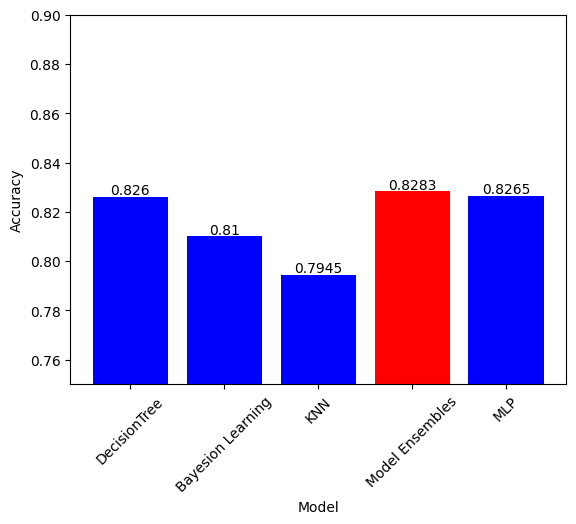

In [13]:
plt.bar(models, accuracy, color=colors)
plt.xticks(np.arange(len(models)), models, rotation=45)
plt.ylim(0.75, 0.9)
plt.xlabel('Model')
plt.ylabel('Accuracy')
for i, v in enumerate(accuracy):
    plt.text(i, v+0.001, str(v), ha='center', fontsize=10)
plt.show()

As you can see here, the best model for this dataset is Model Ensembles, with the accuracy of 82.83%. This is not a very high accuracy rate when compared to excellent machine learning prediction models. The reason could be the low quality of the dataset especially the column 12 to 23, as discussed in the Bayesian Learning part. Admittedly, this project is not perfect and could be further optimized. However, it still provides valuable suggestions for future studies. Specifically, in terms of model optimisation and parameter selection, it is valuable to use GridsearchCV to find the best hype parameters and perform cross-validation. In terms of the model selection for credit card dataset, the Model Ensembles could be a good choice